In [1]:
import pandas as pd
import requests

import matplotlib.pyplot as plt
import seaborn as sns

import os
import acquire as a
import prepare as p

# 1
Convert date column to datetime format.


#load my csv
df = pd.read_csv('ts_superstore.csv', index_col=0)
df.head()

#format sale date
df.sale_date = df.sale_date.str.replace('00:00:00 GMT','')

#remove wihite space
df.sale_date = df.sale_date.str.strip()

#change to date and time
df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y')

#check it out
df.sale_date

# 2
Plot the distribution of sale_amount and item_price.


#distribution of sale_amount
df.sale_amount.hist();

#distribution of item_price
df.item_price.hist();

# 3
Set the index to be the datetime variable.


#set index as sale_date
df = df.set_index('sale_date')

#sort index values
df = df.sort_index()

#check it out
df.head()

# 4
Add a 'month' and 'day of week' column to your dataframe.


#add day of week column
df['day_of_week'] = df.index.day_name()
df.head()

df['month'] = df.index.month_name()
df.head()

# 5
Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.


df['sales_total']= (df.sale_amount * df.item_price)
df.head()

# 6
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
df = p.get_superstore()
df.head()

# Germany

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:



# 1
Convert date column to datetime format.


In [2]:
#get the data
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = a.get_power(url)
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [3]:
#check dtypes
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [4]:
#rename columns
df = df.rename(columns={'Date':'date','Consumption':'consumption','Wind':'wind','Solar':'solar','Wind+Solar':'wind_solar'})
df

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [5]:
#set datetime
df.date = pd.to_datetime(df.date)
df

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [6]:
#verify datetime in proper format
df.dtypes

date           datetime64[ns]
consumption           float64
wind                  float64
solar                 float64
wind_solar            float64
dtype: object

# 2
Plot the distribution of each of your variables.


In [7]:
df.head()

,date,consumption,wind,solar,wind_solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


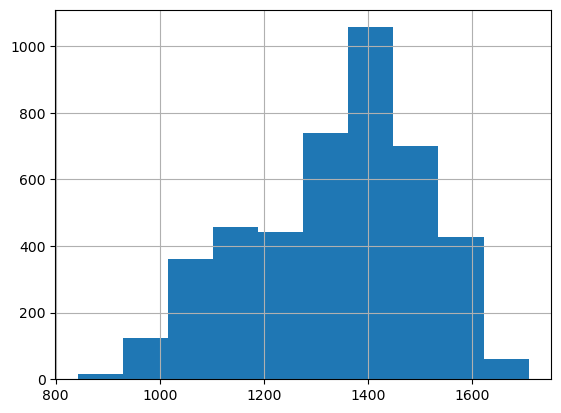

In [8]:
#distribution of consumption
df.consumption.hist()
plt.show()

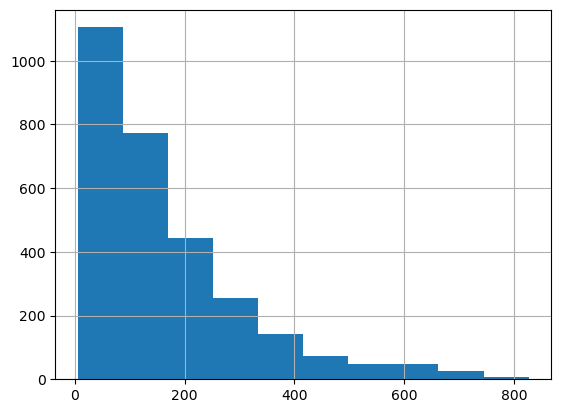

In [9]:
#distribution of wind
df.wind.hist()
plt.show()

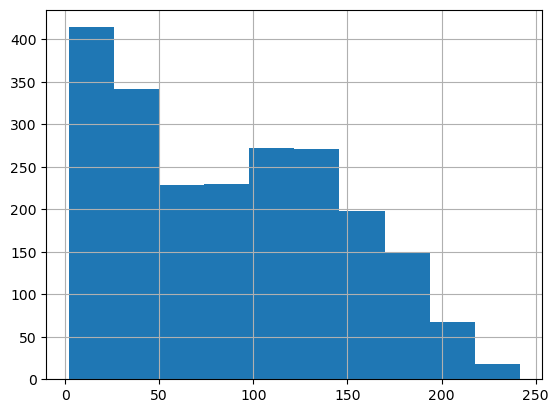

In [10]:
#distribution of solar
df.solar.hist()
plt.show()

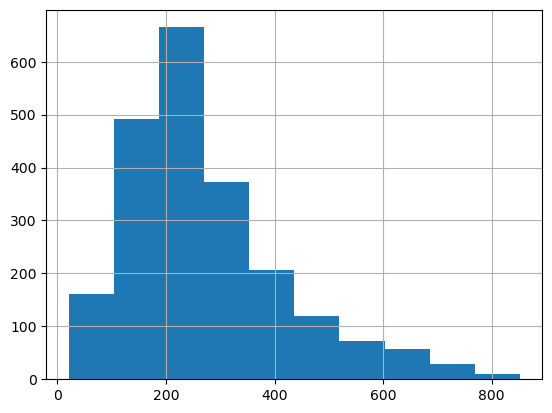

In [11]:
#distribution of wind_solar
df.wind_solar.hist()
plt.show()

# 3
Set the index to be the datetime variable.


In [12]:
df = df.set_index('date')
df.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [13]:
df = df.sort_index()
df.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


# 4
Add a month and a year column to your dataframe.


In [14]:
df['month'] = df.index.month_name() 
df.head()

,consumption,wind,solar,wind_solar,month
date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,NaN,January


In [15]:
df['year'] = df.index.strftime('%Y')
df.head()


,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,2006


# 5
Fill any missing values.

In [16]:
df.isnull().sum()

consumption       0
wind           1463
solar          2195
wind_solar     2196
month             0
year              0
dtype: int64

In [17]:
df.shape

(4383, 6)

<AxesSubplot:xlabel='date'>

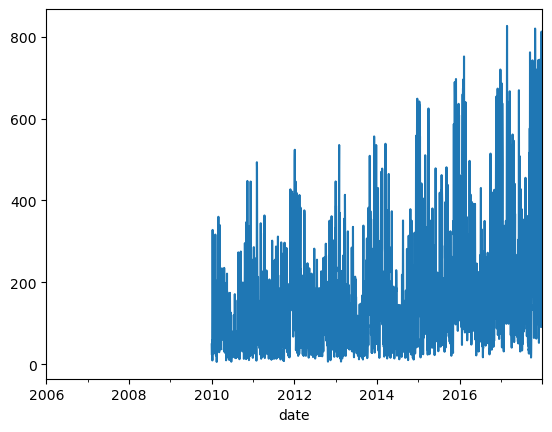

In [18]:
df.wind.plot()

<AxesSubplot:xlabel='date'>

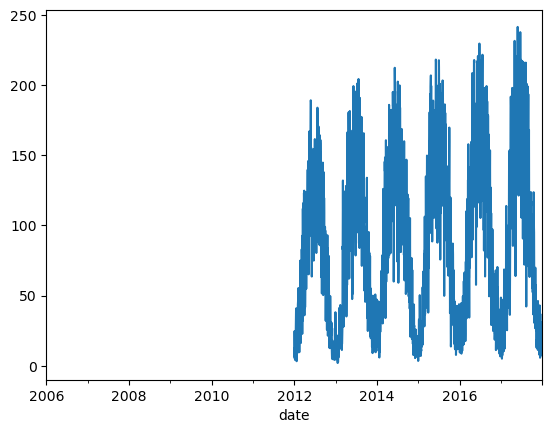

In [19]:
df.solar.plot()

AttributeError: 'DataFrame' object has no attribute 'other_energy_sources'

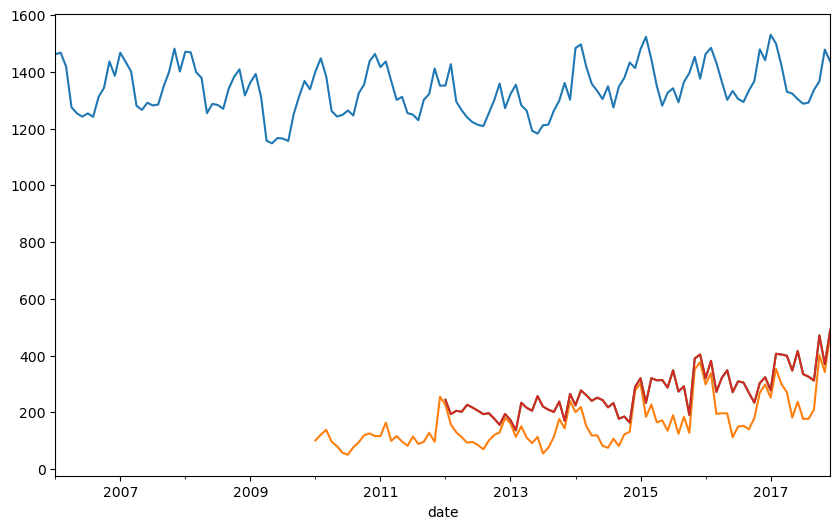

In [20]:
plt.figure(figsize=(10,6))

df.resample('M').mean().consumption.plot(label='Monthly Consumption')
df.resample('M').mean().wind.plot(label='Monthly Wind production')
df.resample('M').mean().wind_solar.plot(label='Monthly Solar production')
df.resample('M').mean().wind_solar.plot(label='mothly Wind and Solar production')
df.resample('M').mean().other_energy_sources.plot(label='Other energy sources')

plt.title('consumption')
plt.legend()
plt.show()

In [21]:
df = df.dropna()


In [22]:
df.head()

,consumption,wind,solar,wind_solar,month,year
date,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,January,2012
2012-01-02,1269.581,207.327,6.574,213.901,January,2012
2012-01-03,1334.745,473.468,24.679,498.147,January,2012
2012-01-04,1347.136,499.804,14.681,514.485,January,2012
2012-01-05,1376.658,523.851,5.071,528.922,January,2012


In [23]:

df.isnull().sum()

consumption    0
wind           0
solar          0
wind_solar     0
month          0
year           0
dtype: int64

In [24]:
df['other_energy_sources'] = df.consumption - df.wind_solar
df

,consumption,wind,solar,wind_solar,month,year,other_energy_sources
date,,,,,,,
2012-01-01,948.12800,227.465,6.587,234.052,January,2012,714.07600
2012-01-02,1269.58100,207.327,6.574,213.901,January,2012,1055.68000
2012-01-03,1334.74500,473.468,24.679,498.147,January,2012,836.59800
2012-01-04,1347.13600,499.804,14.681,514.485,January,2012,832.65100
2012-01-05,1376.65800,523.851,5.071,528.922,January,2012,847.73600
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017,852.90391
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017,779.27798
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017,680.95653


# 6
Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [25]:
#check that function works
df = p.get_germany()
df.head()

,consumption,wind,solar,wind_solar,month,year,other_energy_sources
date,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,January,2012,714.076
2012-01-02,1269.581,207.327,6.574,213.901,January,2012,1055.680
2012-01-03,1334.745,473.468,24.679,498.147,January,2012,836.598
2012-01-04,1347.136,499.804,14.681,514.485,January,2012,832.651
2012-01-05,1376.658,523.851,5.071,528.922,January,2012,847.736


In [26]:
df.dtypes

consumption             float64
wind                    float64
solar                   float64
wind_solar              float64
month                    object
year                      int64
other_energy_sources    float64
dtype: object

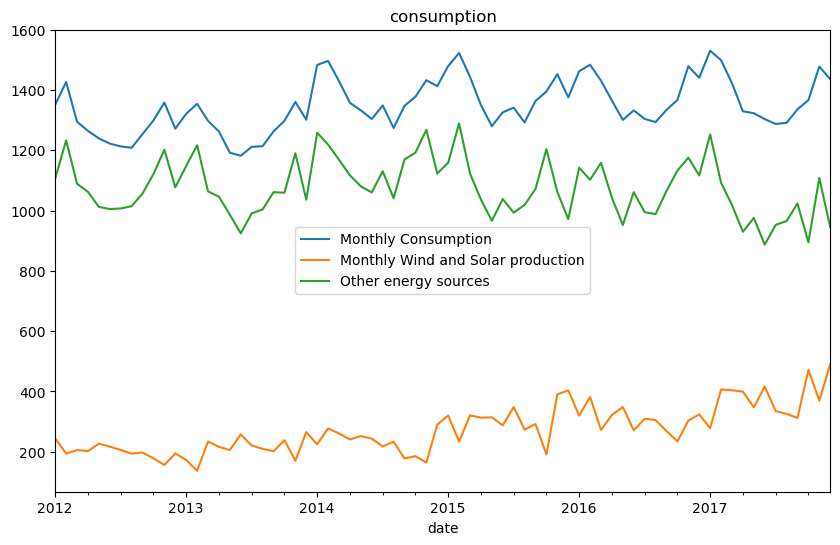

In [28]:
plt.figure(figsize=(10,6))

df.resample('M').mean().consumption.plot(label='Monthly Consumption')
#df.resample('M').mean().wind.plot(label='Monthly Wind production')
#df.resample('M').mean().solar.plot(label='Monthly Solar production')
df.resample('M').mean().wind_solar.plot(label='Monthly Wind and Solar production')
df.resample('M').mean().other_energy_sources.plot(label='Other energy sources')

plt.title('consumption')
plt.legend()
plt.show()